In [11]:
import numpy as np
import pandas as pd
from scipy import log,exp,sqrt,stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import numpy.random as npr
from BS_pricer import *

In [22]:
#%pip install matplotlib

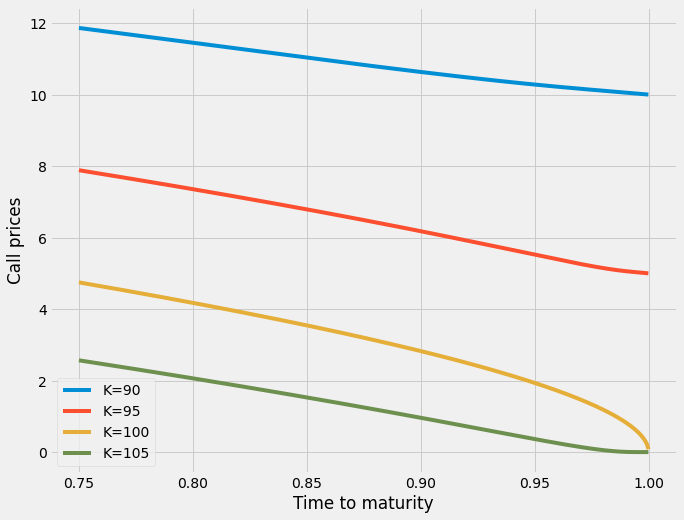

In [14]:
t = np.arange(0.75,1.0,0.0001)
a=[]
b=[]
c=[]
d=[]
for T in t:
    a.append(BS_pricer.BS_closed("call" ,100,90,1-T,0.06,0.2))
    b.append(BS_pricer.BS_closed("call" ,100,95,1-T,0.06,0.2))
    c.append(BS_pricer.BS_closed("call" ,100,100,1-T,0.06,0.2))
    d.append(BS_pricer.BS_closed("call" ,100,105,1-T,0.06,0.2))

plt.figure(figsize = (10,8))
plt.plot(t,a, label = 'K=90')
plt.plot(t,b, label = 'K=95')
plt.plot(t,c, label = 'K=100')
plt.plot(t,d, label = 'K=105')

plt.xlabel("Time to maturity")
plt.ylabel("Call prices")
plt.legend()
plt.show()

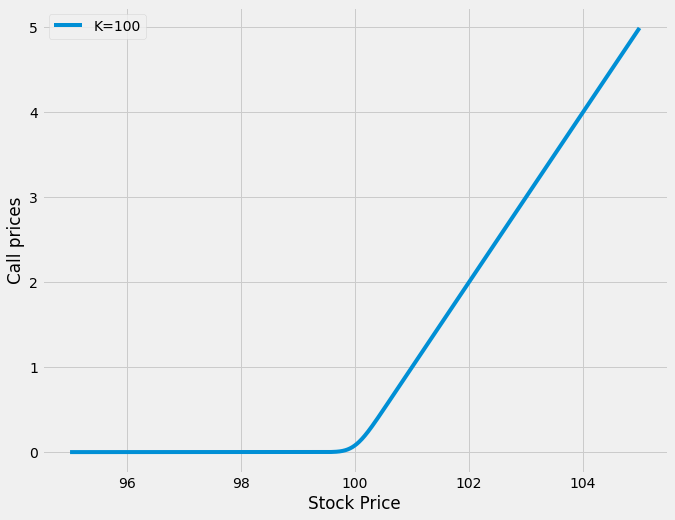

In [19]:
s = np.arange(95,105,0.01)
T= 0.9999
a=[]
for S in s:
    a.append(BS_pricer.BS_closed("call" ,S,100,1-T,0.06,0.2))
    

plt.figure(figsize = (10,8))
plt.plot(s,a, label = 'K=100')


plt.xlabel("Stock Price")
plt.ylabel("Call prices")
plt.legend()
plt.show()

Monte Carlo Method


In [38]:
r=0.06
sigma = 0.2
T = 1.0
S0 = 100
iterations = 10000
intervals = 100
dt = T/intervals

S = np.zeros((intervals+1,iterations))
S[0] = 100
for i in range(1,intervals+1):
    S[i] = S[i-1]*np.exp((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*npr.standard_normal(iterations))

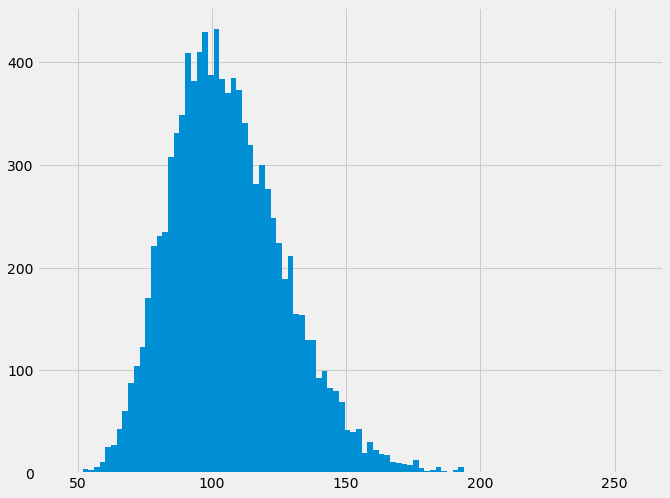

In [46]:
plt.figure(figsize = (10,8))
plt.hist(S[100] , bins=100)
plt.show()
#stock price follows log normal distribution

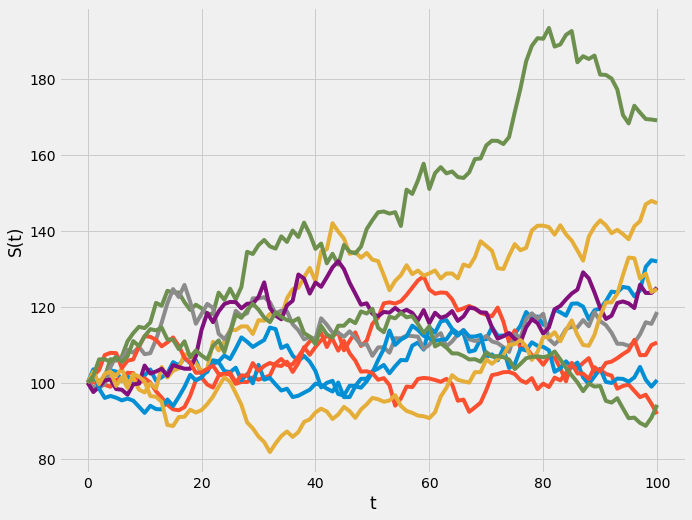

In [50]:
plt.figure(figsize=(10, 8))
plt.plot(S[:, :10])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.show()

In [53]:
def BS_Call_MC(S,K,r,sigma,t,iterations):
    data = np.zeros((iterations,2))
    z = npr.standard_normal(iterations)
    S_T = S*np.exp((r-0.5*sigma**2)*(t) + sigma*np.sqrt(t)*z)
    data[:,0] = S_T
    data[:,1] = S_T - K
    average = np.sum(data[:,1])/float(iterations)
    return np.exp(-r*t)*average

In [60]:
print(BS_Call_MC(100,95,0.06,0.3,0.001,100000)) #monte carlo simulation
print(BS_pricer.BS_closed("call" ,100,95,0.001,0.06,0.3)) #black scholes closed

5.006529271114735
5.005699833982007


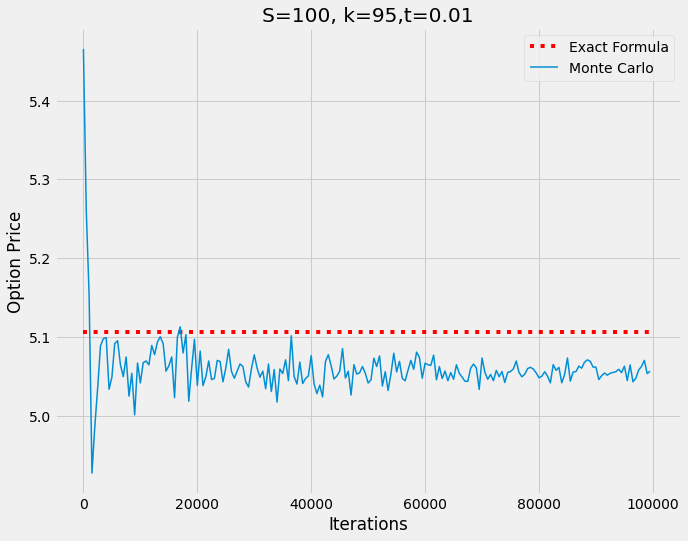

In [71]:
df = pd.DataFrame(columns = ['Iter' , 'BS_MC'])
for i in range(1,100000,500):
    df = df.append({'Iter':i , 'BS_MC' : BS_Call_MC(100,95,0.06,0.3,0.01,i)} , ignore_index = True)

plt.figure(figsize = (10,8))

plt.hlines(BS_pricer.BS_closed("call" ,100,95,0.01,0.06,0.3) , xmin=0,xmax = 100000 ,color = 'red' ,linestyle ='dotted' ,label = 'Exact Formula')
plt.plot(df.set_index('Iter') , linewidth = 1.5,label = 'Monte Carlo')
plt.title('S=100, k=95,t=0.01')
plt.ylabel('Option Price')
plt.xlabel('Iterations')
plt.legend()
plt.show()

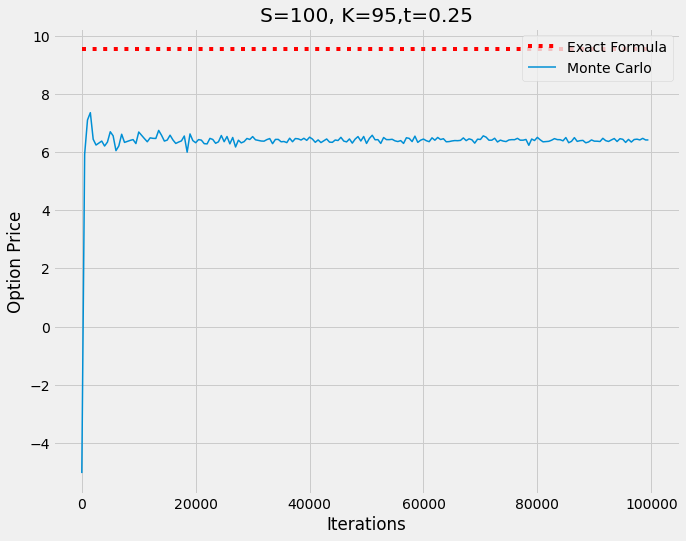

In [72]:
df = pd.DataFrame(columns = ['Iter' , 'BS_MC'])
for i in range(1,100000,500):
    df = df.append({'Iter':i , 'BS_MC' : BS_Call_MC(100,95,0.06,0.3,0.25,i)} , ignore_index = True)

plt.figure(figsize = (10,8))

plt.hlines(BS_pricer.BS_closed("call" ,100,95,0.25,0.06,0.3) , xmin=0,xmax = 100000 ,color = 'red' ,linestyle ='dotted' ,label = 'Exact Formula')
plt.plot(df.set_index('Iter') , linewidth = 1.5,label = 'Monte Carlo')
plt.title('S=100, K=95,t=0.25')
plt.ylabel('Option Price')
plt.xlabel('Iterations')
plt.legend()
plt.show()